In [5]:
import pandas as pd
data = pd.read_csv("utestasjon-bones.csv")
print(data.describe())

         temperatur     lufttrykk  luftfuktighet          pm25          pm10
count  42238.000000  42238.000000   42238.000000  42238.000000  42238.000000
mean       6.217278   1010.490854      35.776787     11.644065     14.980515
std        4.399180     12.382732       6.519938     19.081614     24.656798
min       -2.865827    991.712587      17.097258      0.000000      0.000000
25%        2.075431    999.897409      30.309923      0.000000      0.000000
50%        7.093041   1008.161904      38.322036      2.000000      3.000000
75%       10.313802   1021.528501      40.426141     15.000000     19.000000
max       26.063974   1032.674961      55.113000    359.000000    492.000000


In [6]:
data.head() # viser de første radene

,dato,temperatur,lufttrykk,luftfuktighet,pm25,pm10
0,2022-11-15 18:59:55.540108,25.967480,1000.728005,25.025103,1,1
1,2022-11-15 19:00:28.377546,25.853753,1000.696595,25.183850,1,3
2,2022-11-15 19:01:01.211174,26.063974,1000.721758,25.257006,2,2
3,2022-11-15 19:01:33.977001,26.058929,1000.690602,25.218070,0,2
4,2022-11-15 19:02:06.806198,25.597409,1000.692818,25.406987,0,0


In [7]:
data.dtypes

dato              object
temperatur       float64
lufttrykk        float64
luftfuktighet    float64
pm25               int64
pm10               int64
dtype: object

In [8]:
data['dato'] = pd.to_datetime(data['dato'])
data.dtypes
#data[data['dato'].dt.strftime('%Y-%m-%d') == '2022-12-01'] 
#bestemtDag = (data['dato'].dt.year == 2022 and data['dato'].dt.month == 12 and data['dato'].dt.day == 1)

dato             datetime64[ns]
temperatur              float64
lufttrykk               float64
luftfuktighet           float64
pm25                      int64
pm10                      int64
dtype: object

In [9]:
data["dato"].max() - data["dato"].min() # tidsrommet
#plt.plot(data['dato'] == '2022-12-01', data['temperatur'])

Timedelta('18 days 14:38:27.886694')

In [10]:
data['pm10'] # viser bare kolonnen pm10

0         1
1         3
2         2
3         2
4         0
         ..
42233    15
42234    18
42235    18
42236    18
42237    18
Name: pm10, Length: 42238, dtype: int64

In [11]:
data['pm10'].mean() # gjennomsnittlig pm10

14.98051517590795

In [ ]:
# Viser alle verdier av pm10 som er større enn 50
data[data['pm10'] > 50]

In [ ]:
# Viser alle verdier av pm10 som er større enn 50 og mindre enn 100
data[(data['pm10'] > 50) & (data['pm10'] < 100)]

In [ ]:
data[data.temperatur < 0] # alle rader med temperatur under 0

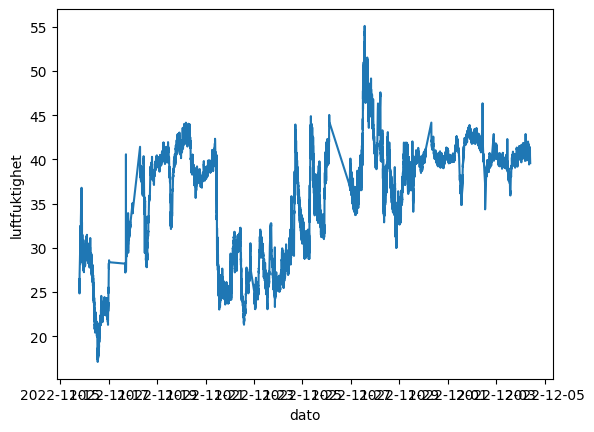

In [12]:
import matplotlib.pyplot as plt
plt.plot(data['dato'], data['luftfuktighet'])
plt.xlabel('dato')
plt.ylabel('luftfuktighet')
plt.show()

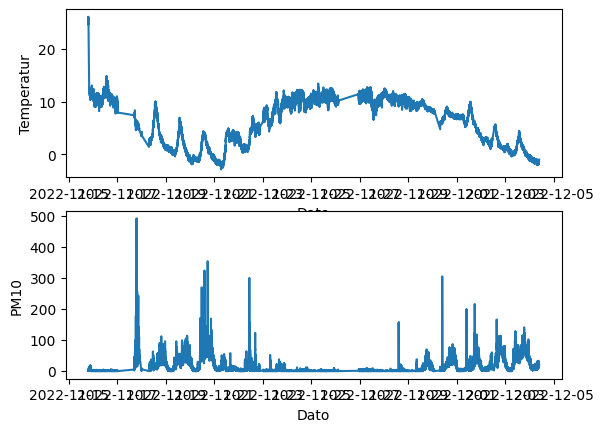

In [13]:
# Eksempel som viser korleis du kan teikne to grafar på same figur
plt.subplot(2, 1, 1)
plt.plot(data['dato'], data['temperatur'])
plt.xlabel('Dato')
plt.ylabel('Temperatur')
plt.subplot(2, 1, 2)
plt.plot(data['dato'], data['pm10'])
plt.xlabel('Dato')
plt.ylabel('PM10')
plt.show()

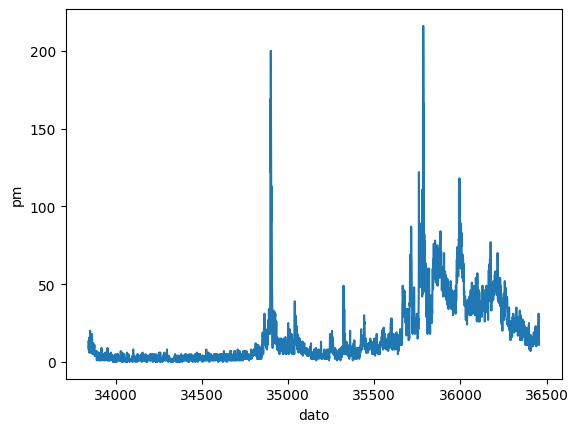

In [14]:
# NB: Sjølv om dette eksempelet fungerer så er det per no problem med x-aksen
# Plott pm10 og pm2.4 for en gitt dag
data[data['dato'].dt.strftime('%Y-%m-%d') == '2022-12-01'].pm10.plot(label='pm10')
#data[data['dato'].dt.strftime('%Y-%m-%d') == '2022-12-01'].pm25.plot(label='pm25')
plt.xlabel('dato')
plt.ylabel('pm')
plt.show()

In [ ]:
plt.subplot(2, 1, 1)
data[data['dato'].dt.strftime('%Y-%m-%d') == '2022-12-01'].pm25.plot(label='pm25')
plt.xlabel('Dato')
plt.ylabel('Temperatur')
plt.subplot(2, 1, 2)
data[data['dato'].dt.strftime('%Y-%m-%d') == '2022-12-01'].pm10.plot(label='pm25')
plt.xlabel('Dato')
plt.ylabel('PM10')
plt.show()

In [ ]:
# https://towardsdatascience.com/a-collection-of-must-know-techniques-for-working-with-time-series-data-in-python-7c01d199b184
#data['dato'] = pd.date_range(start = "2022-11-28", end = "2022-11-29", freq="H")

In [ ]:
# Alternativ del som bruker csv-biblitoeket for å tolke og visualisere data
import csv
with open("utestasjon-bones.csv", encoding="utf-8-sig") as fil:
    filinnhold = csv.reader(fil, delimiter=";")

    overskrifter = next(filinnhold)
    print(overskrifter)

    for rad in filinnhold:
        print(rad)

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import csv

# Lister for å ta vare på ulike verdiar
tidspunkt = []
pm25 = []
pm10 = []

with open("utestasjon-bones.csv", encoding="utf-8-sig") as fil:
  filinnhold = csv.reader(fil, delimiter=",")

  overskrifter = next(filinnhold)
  print(overskrifter)
  
  for rad in filinnhold:
    #tidspunkt.append(int(rad[0])) # dette er eit problem
    tidspunkt.append(datetime.strptime(rad[0], "%Y-%m-%d %H:%M:%S.%f"))
    pm25.append(int(rad[4]))

# Tegner grafen
plt.plot(tidspunkt, pm25)
plt.grid()
plt.show()